In [202]:
import numpy as np         
import pandas as pd        

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
sns.set_style("whitegrid", {'axes.grid' : False})

In [203]:
df_distance = pd.read_csv("D:\FES data science\Data_analysis_FES\Data (clear)\Расстояние до москвы всех регионов", sep = ',')
df_wage = pd.read_csv("D:\FES data science\Data_analysis_FES\Data (clear)\Среднемесячная начисленная номинальная заработная плата по регионам(clear).csv", sep = ';')
df_price = pd.read_csv("D:\FES data science\Data_analysis_FES\Data (clear)\Стоимость потребительского набора товаров и услуг(средняя)(clear).csv", sep = ';')
df_price_min = pd.read_csv("D:\FES data science\Data_analysis_FES\Data (clear)\Стоимость условного (минимального) набора продуктов питания(clear).csv", sep = ';')
df_population = pd.read_csv("D:\FES data science\Data_analysis_FES\Data (clear)\Численность населения по регионам(clear).csv", sep = ';')

Далее будем совершать merge по регионам, поэтому для начала приведем все названия к одному виду. В качестве основного возьмём __df_distance__, так как данные по расстоянию для нас являются основными.

In [204]:
df_distance = df_distance.rename(columns={"Unnamed: 0": "Регионы", "0": "Расстояние до Москвы"})
df_wage = df_wage.drop(69)
df_wage = df_wage.reset_index(drop=True)

In [205]:
for i in range(96):
    print(i)
    print(df_wage['Регион'].iloc[i])
    print(df_price['Регионы'].iloc[i])
    print(df_price_min['Регионг'].iloc[i])
    print(df_population['Регион'].iloc[i])
    print(df_distance['Регионы'].iloc[i])

0
Российская Федерация
Российская Федерация
Российская Федерация
Российская Федеpация
Российская Федерация
1
Центральный федеральный округ
Центральный федеральный округ
    Центральный федеральный округ
Центральный федеральный округ
Центральный федеральный округ
2
Белгородская область
Белгородская область
        Белгородская область
Белгородская область
Белгородская область
3
Брянская область
Брянская область
        Брянская область
Брянская область
Брянская область
4
Владимирская область
Владимирская область
        Владимирская область
Владимирская область
Владимирская область
5
Воронежская область
Воронежская область
        Воронежская область
Воронежская область
Воронежская область
6
Ивановская область
Ивановская область
        Ивановская область
Ивановская область
Ивановская область
7
Калужская область
Калужская область
        Калужская область
Калужская область
Калужская область
8
Костромская область
Костромская область
        Костромская область
Костромская область
Костром

IndexError: single positional indexer is out-of-bounds

Проанализиров данные, сразу уберём Архангельскую область, оставив только просто Архангельскую область без ненцкого автономного округа. Ещё мы уберём Тюменскую область, так как для нас такие данные неудобны по той причине, что расстояние там одинаковое, а мы получаем несколько различный данных. Лучше рассматривать регион цельно, убрав автономные округа, а в остальных местах смотреть, как будто автономные регионы - это отдельные регионы.

In [206]:
df_wage = df_wage.drop([23, 68])
df_price = df_price.drop([23, 68])
df_price_min = df_price_min.drop([23, 68])
df_population = df_population.drop([23, 68])
df_price = df_price.reset_index(drop=True)
df_price_min = df_price_min.reset_index(drop=True)
df_population = df_population.reset_index(drop=True)
df_wage = df_wage.reset_index(drop=True)
x = df_distance.iloc[23]
df_distance.iloc[23] = df_distance.iloc[24]
df_distance.iloc[24] = x
x = df_distance.iloc[67]
y = df_distance.iloc[68]
df_distance.iloc[68] = df_distance.iloc[69]
df_distance.iloc[69] = x
df_distance.iloc[67] = y

Теперь у нас хорошо предобработанны данные, их можно переименовать и соединить в единную таблицу, где будет храниться вся необходимая информация.

In [207]:
for i in range(94):
    print(i)
    print(df_wage['Регион'].iloc[i])
    print(df_price['Регионы'].iloc[i])
    print(df_price_min['Регионг'].iloc[i])
    print(df_population['Регион'].iloc[i])
    print(df_distance['Регионы'].iloc[i])

0
Российская Федерация
Российская Федерация
Российская Федерация
Российская Федеpация
Российская Федерация
1
Центральный федеральный округ
Центральный федеральный округ
    Центральный федеральный округ
Центральный федеральный округ
Центральный федеральный округ
2
Белгородская область
Белгородская область
        Белгородская область
Белгородская область
Белгородская область
3
Брянская область
Брянская область
        Брянская область
Брянская область
Брянская область
4
Владимирская область
Владимирская область
        Владимирская область
Владимирская область
Владимирская область
5
Воронежская область
Воронежская область
        Воронежская область
Воронежская область
Воронежская область
6
Ивановская область
Ивановская область
        Ивановская область
Ивановская область
Ивановская область
7
Калужская область
Калужская область
        Калужская область
Калужская область
Калужская область
8
Костромская область
Костромская область
        Костромская область
Костромская область
Костром

Осталось поменять одну строчку местами и можно соеденять данные в единую таблицу.

In [208]:
x = df_wage.iloc[84]
y = df_population.iloc[84]
df_wage.iloc[84] = df_wage.iloc[85]
df_population.iloc[84] = df_population.iloc[85]
df_wage.iloc[85] = x
df_population.iloc[85] = y

In [209]:
for i in range(94):
    print(i)
    print(df_wage['Регион'].iloc[i])
    print(df_price['Регионы'].iloc[i])
    print(df_price_min['Регионг'].iloc[i])
    print(df_population['Регион'].iloc[i])
    print(df_distance['Регионы'].iloc[i])

0
Российская Федерация
Российская Федерация
Российская Федерация
Российская Федеpация
Российская Федерация
1
Центральный федеральный округ
Центральный федеральный округ
    Центральный федеральный округ
Центральный федеральный округ
Центральный федеральный округ
2
Белгородская область
Белгородская область
        Белгородская область
Белгородская область
Белгородская область
3
Брянская область
Брянская область
        Брянская область
Брянская область
Брянская область
4
Владимирская область
Владимирская область
        Владимирская область
Владимирская область
Владимирская область
5
Воронежская область
Воронежская область
        Воронежская область
Воронежская область
Воронежская область
6
Ивановская область
Ивановская область
        Ивановская область
Ивановская область
Ивановская область
7
Калужская область
Калужская область
        Калужская область
Калужская область
Калужская область
8
Костромская область
Костромская область
        Костромская область
Костромская область
Костром

Переименуем столбцы, чтобы дальше было легче ориентироваться.

In [210]:
df_wage = df_wage.rename(columns={"Регион": "Регионы", "январь": "Зарплаты (январь)", "февраль": "Зарплаты (февраль)"})
df_price = df_price.rename(columns={"январь": "Стоимость корзины (январь)", "февраль": "Стоимость корзины (февраль)"})
df_price_min = df_price_min.rename(columns={"Регионг": "Регионы", "февраль": "Стоимость корзины (минимальная) (январь)", "март": "Стоимость корзины (минимальная) (февраль)"})
df_population = df_population.rename(columns={"Регион": "Регионы"})

Переименуем первый столбец, чтобы он совпадал и мы могли спокойно заджойнить таблички.

In [211]:
df_wage = df_wage.assign(Регионы = df_distance['Регионы'])
df_price = df_price.assign(Регионы = df_distance['Регионы'])
df_population = df_population.assign(Регионы = df_distance['Регионы'])
df_price_min = df_price_min.assign(Регионы = df_distance['Регионы'])

In [212]:
df = df_distance
df = df.merge(df_wage, left_on='Регионы', right_on='Регионы')
df = df.merge(df_price, left_on='Регионы', right_on='Регионы')
df = df.merge(df_population, left_on='Регионы', right_on='Регионы')
df = df.merge(df_price_min, left_on='Регионы', right_on='Регионы')

In [213]:
df.sample(5)

,Регионы,Расстояние до Москвы,Зарплаты (январь),Зарплаты (февраль),Стоимость корзины (январь),Стоимость корзины (февраль),Все население,Городское население,Сельское население,Стоимость корзины (минимальная) (январь),Стоимость корзины (минимальная) (февраль)
84,Забайкальский край,4872.975262,72880.0,71526.0,21680.60,22015.93,992429,689961,302468,7767.55,7775.78
65,Курганская область,1630.481964,53235.0,54942.0,19442.30,19530.35,761586,489010,272576,5700.59,5728.05
5,Воронежская область,556.962522,55793.0,56371.0,20625.06,20816.33,2285282,1565753,719529,5323.41,5357.30
52,Республика Мордовия,460.621652,49968.0,49500.0,18529.42,18607.38,771373,490388,280985,4959.09,4991.13
68,Ямало-Ненецкий автономный округ,2282.631120,142150.0,149951.0,25285.62,25457.90,512387,434071,78316,7931.05,7995.93


__Описание переменных:__
* `Регионы:` Регионы Российской федерации + округа
* `Расстояние до Москвы:` расстояние до города Москва от центра регионов в киллометрах(географическое)
* `Зарплаты (январь):` Номинальная заработная плата граждан РФ по регионам за январь (медианная)
* `Зарплаты (февраль):` Номинальная заработная плата граждан РФ по регионам за февраль (медианная)
* `Стоимость корзины (январь):` Стоимость корзины основных товаров и услуг, потребляемых гражданами РФ на постоянной основе за январь 
* `Стоимость корзины (февраль):` Стоимость корзины основных товаров и услуг, потребляемых гражданами РФ на постоянной основе за февраль
* `Все население:` Население в определённых регионах Российской федерации
* `Городское население:` Число городского населения региона в РФ
* `Сельское население:`  Число сельского населения региона в РФ
* `Стоимость корзины (минимальная) (январь):` Стоимость минимального набора продуктов питания гражданина РФ в определённом регионе за явнварь
* `Стоимость корзины (минимальная) (февраль):` Стоимость минимального набора продуктов питания гражданина РФ в определённом регионе за февраль

Вот наконец мы получили итоговые данные, с ними уже можно работать. Проверим на отсутвие пропусков, проведем разведочный анализ данных и удалим бессмысленные для нас строчки.

Посмотрим на наличие пропусков и тип данных:

In [214]:
df.isna().sum()

Регионы                                      0
Расстояние до Москвы                         0
Зарплаты (январь)                            0
Зарплаты (февраль)                           0
Стоимость корзины (январь)                   0
Стоимость корзины (февраль)                  0
Все население                                0
Городское население                          0
Сельское население                           0
Стоимость корзины (минимальная) (январь)     0
Стоимость корзины (минимальная) (февраль)    0
dtype: int64

In [215]:
df.dtypes

Регионы                                       object
Расстояние до Москвы                         float64
Зарплаты (январь)                            float64
Зарплаты (февраль)                           float64
Стоимость корзины (январь)                   float64
Стоимость корзины (февраль)                  float64
Все население                                  int64
Городское население                            int64
Сельское население                             int64
Стоимость корзины (минимальная) (январь)     float64
Стоимость корзины (минимальная) (февраль)    float64
dtype: object

Пропусков нет, категориальных переменных тоже (потому что здесь Регион - индекс), все типы данных соответсвуют данным.

Для начала посмотрим на зарплаты, стоимость коризны и стоимость корзины в разные месяцы, чтобы понять, были ли где-то радикальные изменения.

In [216]:
columns = [('Зарплаты (январь)', 'Зарплаты (февраль)'), ('Стоимость корзины (январь)','Стоимость корзины (февраль)'), ('Стоимость корзины (минимальная) (январь)','Стоимость корзины (минимальная) (февраль)')]

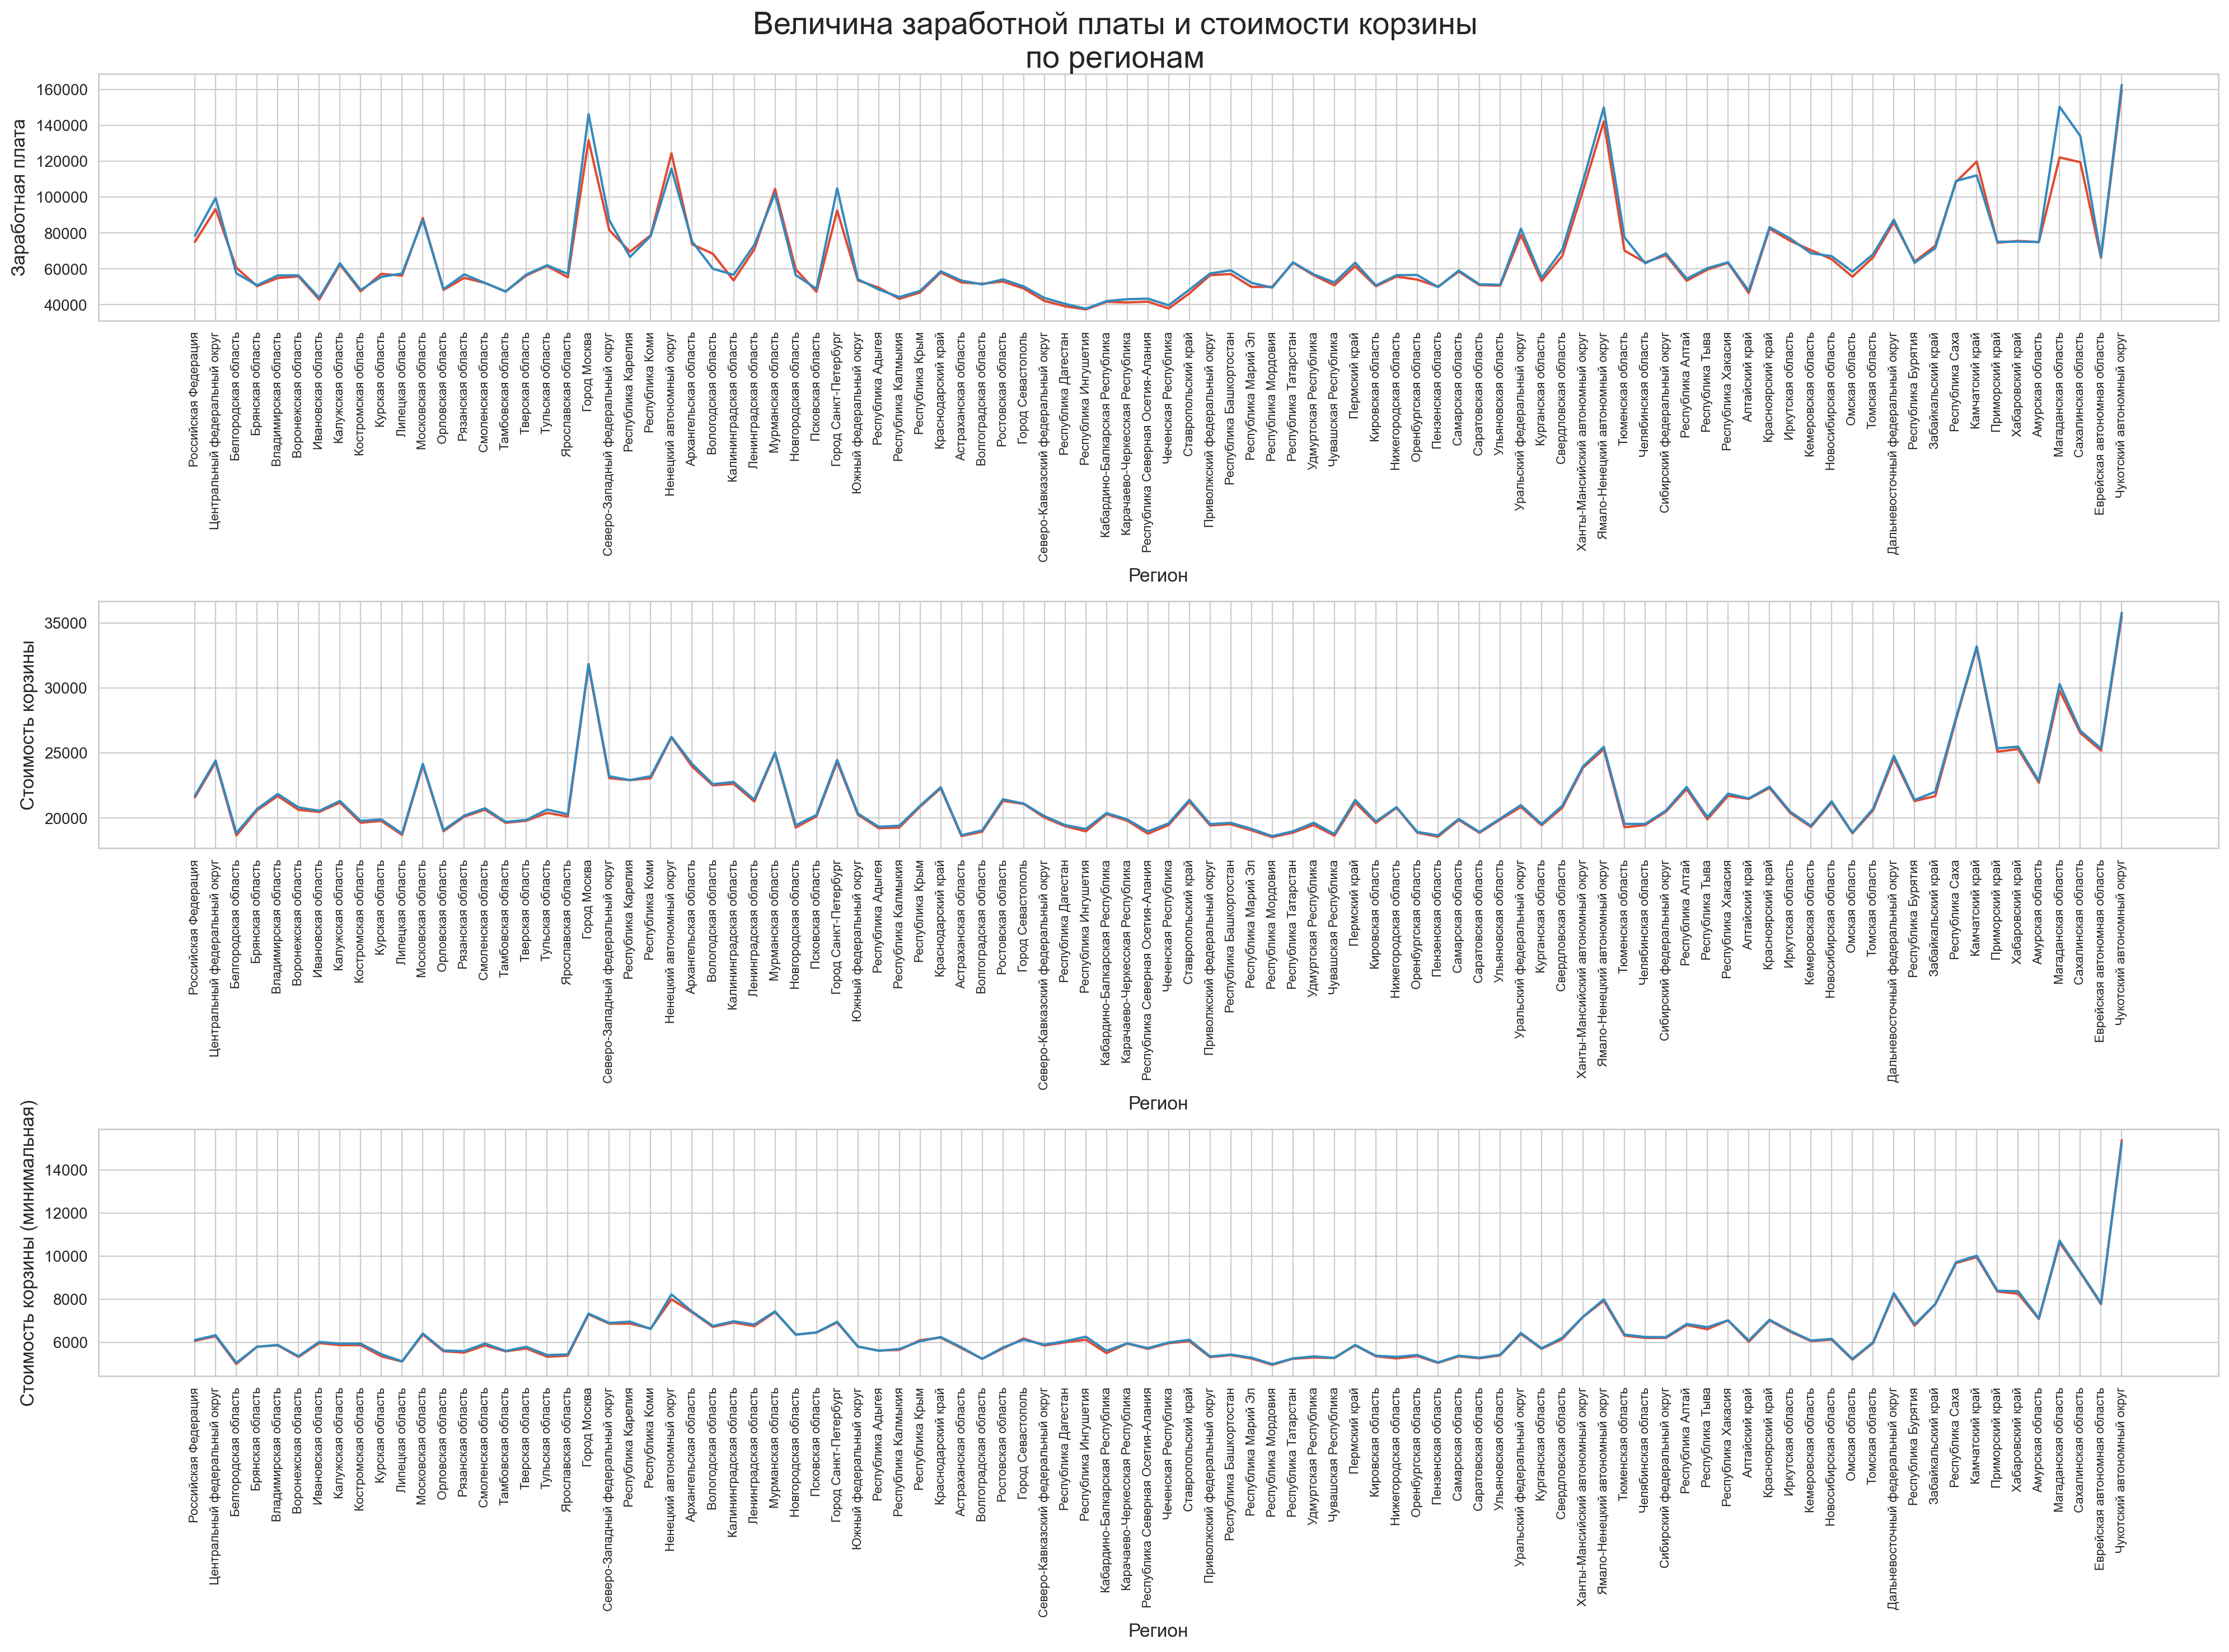

In [217]:
fig, axs = plt.subplots(figsize=(20, 15), nrows=3, ncols=1)
fig.suptitle('Величина заработной платы и стоимости корзины\nпо регионам', fontsize = 20)
for i, feature in enumerate(columns):
    axs[i].plot(np.arange(df.shape[0]),np.round(df[feature[0]]))
    axs[i].plot(np.arange(df.shape[0]),np.round(df[feature[1]]))
    axs[i].set_xlabel("Регион")
    axs[i].set_xticks(np.arange(df.shape[0]),
           labels=df['Регионы'],
           fontsize=8,
           rotation=90)
    axs[i].grid()
axs[0].set_ylabel(f"Заработная плата")
axs[1].set_ylabel(f"Стоимость корзины")
axs[2].set_ylabel(f"Стоимость корзины (минимальная)")
plt.tight_layout() 

Можем заметить, что данные в явнваре и феврале практические не отличаются, поэтому будет совершенно нормально взять данные только за один месяц, к примеру, за февраль, так как они более актуальные.

In [218]:
df = df.drop(columns=['Зарплаты (январь)', 'Стоимость корзины (январь)', 'Стоимость корзины (минимальная) (январь)'])
df = df.rename(columns={"Зарплаты (февраль)": "Зарплаты", "Стоимость корзины (минимальная) (февраль)": "Стоимость корзины (минимальная)", "Стоимость корзины (февраль)": "Стоимость корзины"})

In [219]:
df.sample(5)

,Регионы,Расстояние до Москвы,Зарплаты,Стоимость корзины,Все население,Городское население,Сельское население,Стоимость корзины (минимальная)
14,Смоленская область,302.031147,52141.0,20745.49,873041,634366,238675,5945.66
88,Хабаровский край,5955.696955,75167.0,25482.00,1284090,1072186,211904,8373.31
13,Рязанская область,239.571120,56901.0,20181.92,1088918,777235,311683,5593.72
83,Республика Бурятия,4485.321136,63363.0,21385.45,974628,576015,398613,6835.21
52,Республика Мордовия,460.621652,49500.0,18607.38,771373,490388,280985,4991.13


Далее мы уберём Российский федерацию из данных (строчку данных, не сажайте меня), так как расстояние до неё совершенно бессмысленно и какого-то смысла для нас эти данные не несут. Оркга будут оставлены, так как расстояние до них примерно в среднем по больнице отражает расстояние до них, а остальные показатели там взяты как взвешенные средние, поэтому для дальнейших взаимодействий это может быть полезным. Наблюдейний у меня получилось не так много, к сожалению, мы ограничены количеством регионов, а в случае с регионами мы получаем не самый репрезентативный результат в силу особенностей городов.

In [220]:
df = df.drop([0]).reset_index(drop = True)

Далее я предлагаю добавить процентное отношение городноского населения и сельского населения, там как дальше я хочу стратифицировать области, поэтому это будет хорошим показателем для дальнейшего анализа.

In [222]:
df['Процент городского населения'] = df['Городское население'] / df['Все население']
df['Процент сельского населения'] = 1 - df['Процент городского населения']

In [223]:
df.sample(5)

,Регионы,Расстояние до Москвы,Зарплаты,Стоимость корзины,Все население,Городское население,Сельское население,Стоимость корзины (минимальная),Процент городского населения,Процент сельского населения
16,Тульская область,200.286630,61979.0,20647.53,1481471,1083878,397593,5411.41,0.731623,0.268377
72,Республика Тыва,3652.435941,60350.0,20063.94,337271,186501,150770,6705.59,0.552971,0.447029
18,Город Москва,0.000000,146248.0,31831.98,13104177,13104177,0,7336.30,1.000000,0.000000
15,Тверская область,213.863313,56864.0,19853.70,1211183,924628,286555,5794.05,0.763409,0.236591
54,Чувашская Республика,597.590841,52381.0,18760.86,1173177,754451,418726,5280.62,0.643084,0.356916


In [226]:
df.columns

Index(['Регионы', 'Расстояние до Москвы', 'Зарплаты', 'Стоимость корзины',
       'Все население', 'Городское население', 'Сельское население',
       'Стоимость корзины (минимальная)', 'Процент городского населения',
       'Процент сельского населения'],
      dtype='object')

Расммотрим гистограммы основных переменных, чтобы увидеть их распределение и заметить, если какие-то выбросы в данных.

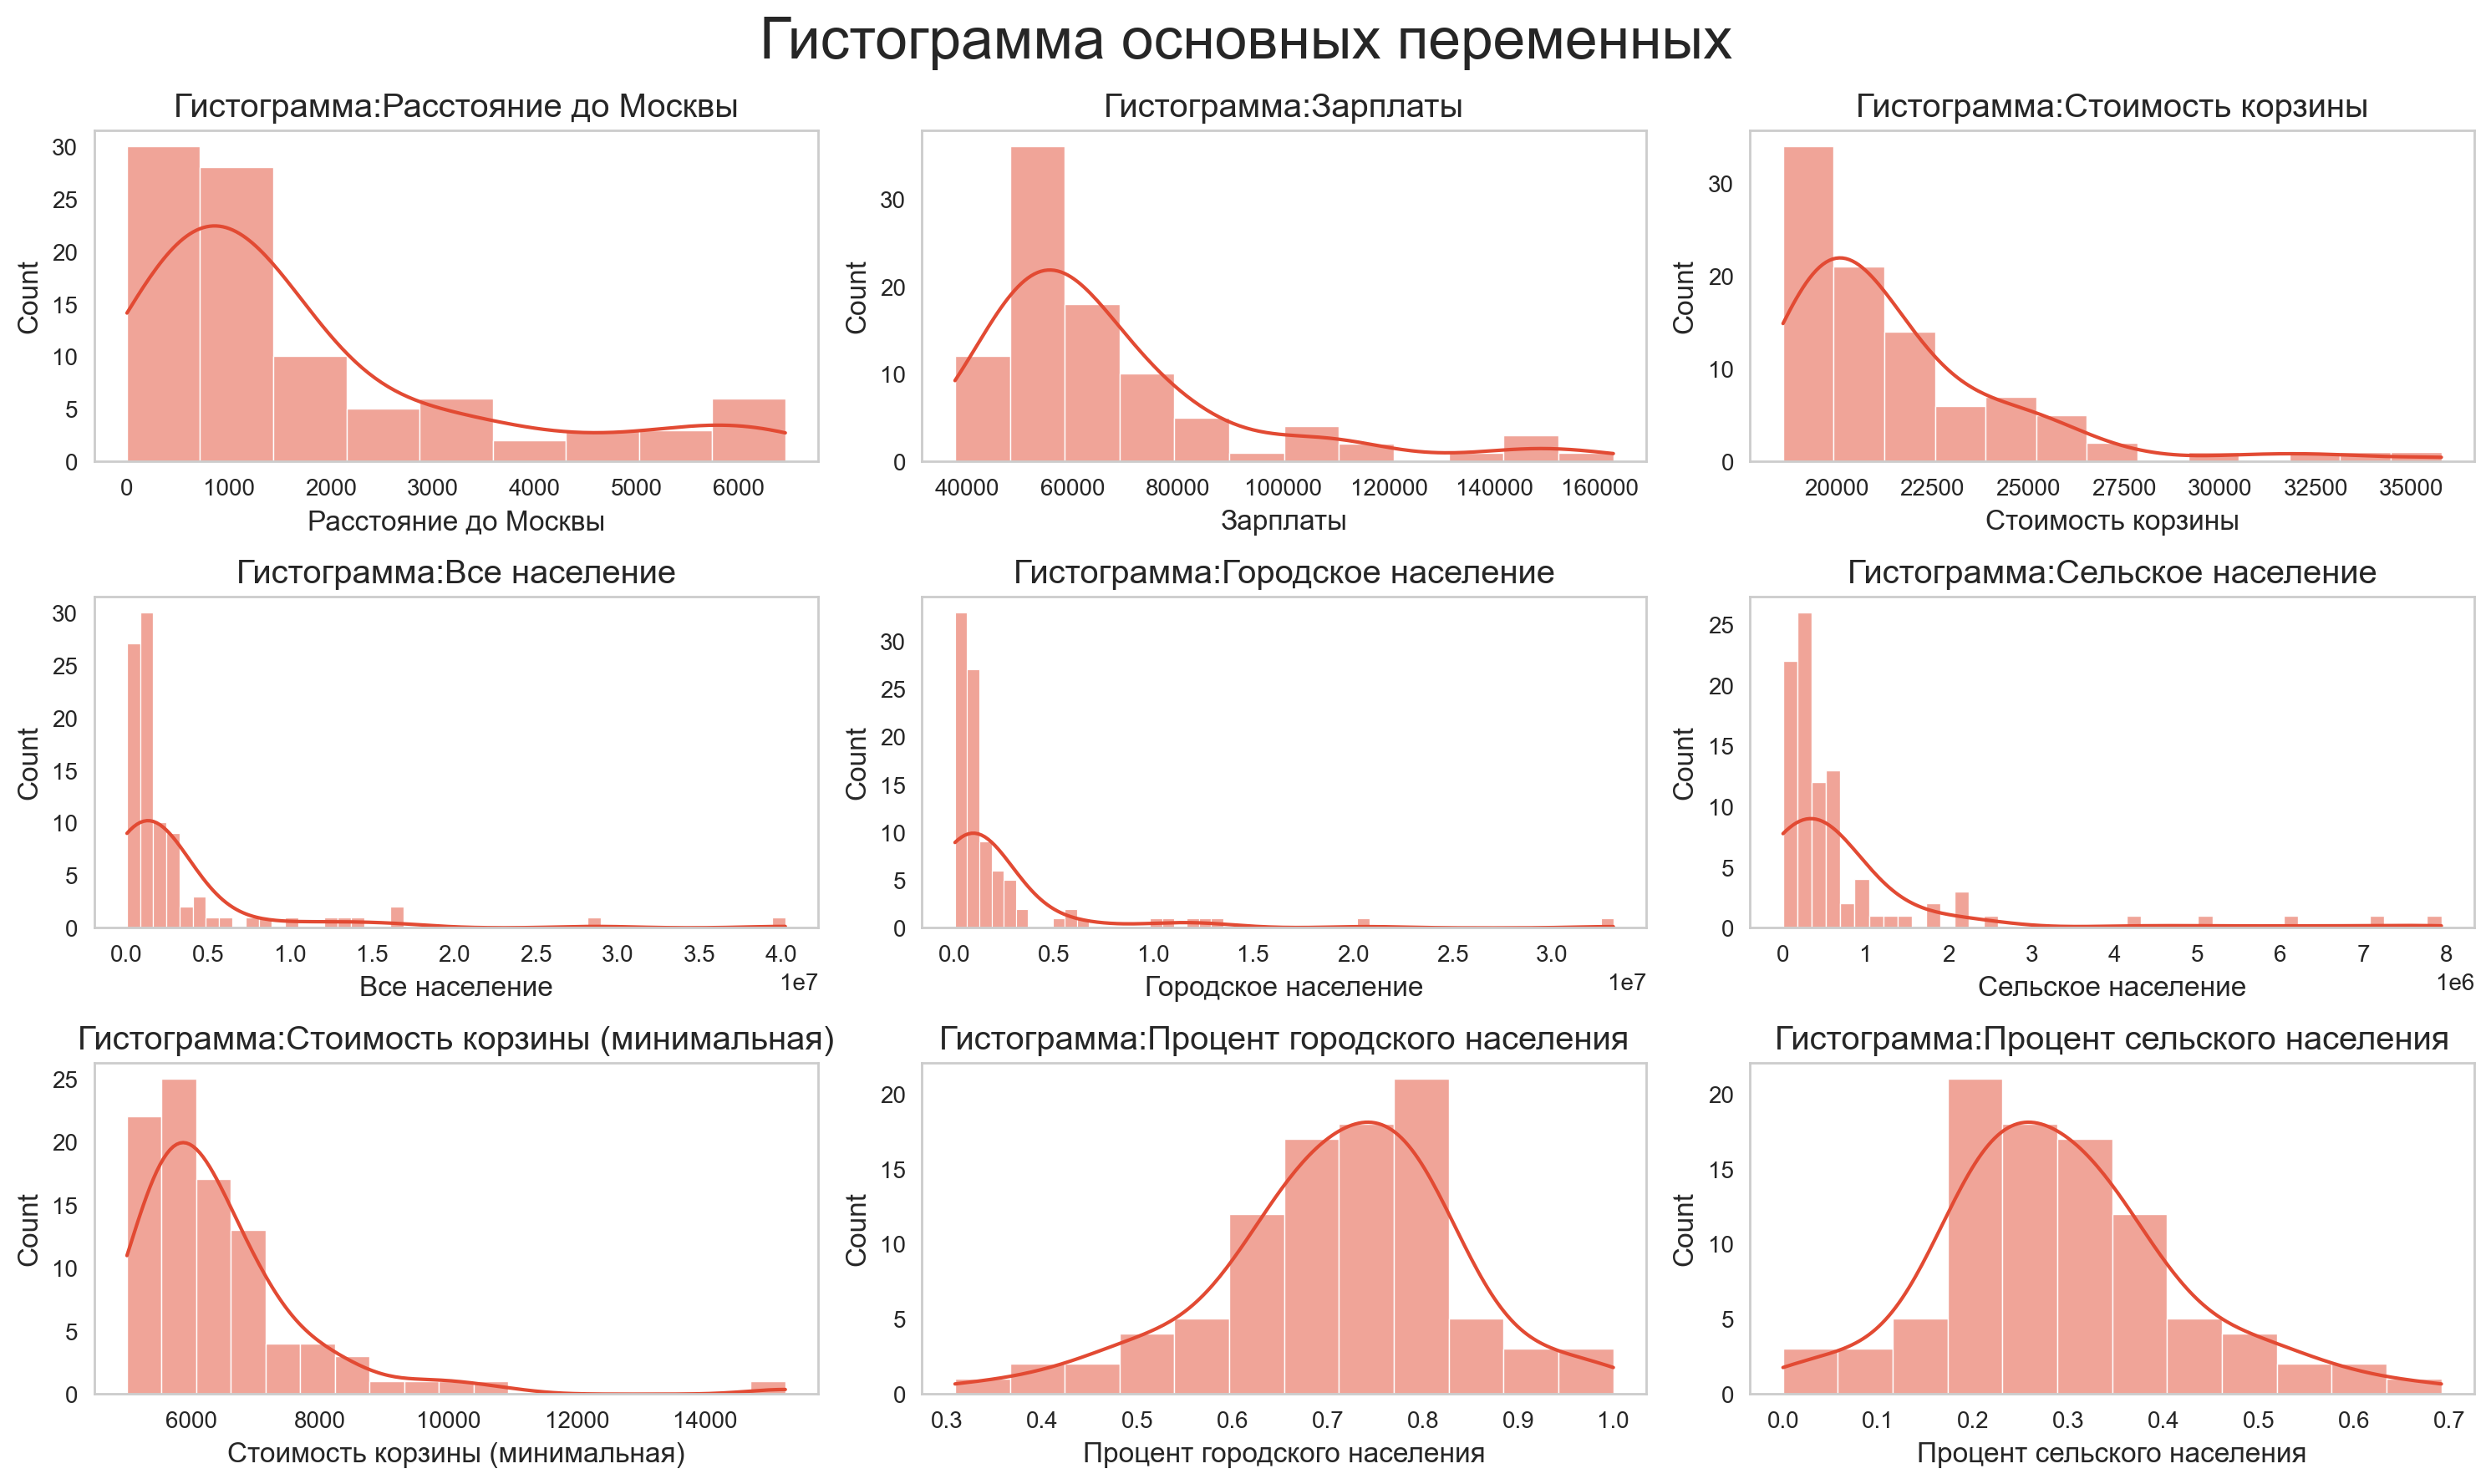

In [231]:
fig = plt.figure(figsize = (15, 9))
fig.suptitle('Гистограмма основных переменных', fontsize = 25)
for i, feature in enumerate(['Расстояние до Москвы', 'Зарплаты', 'Стоимость корзины',
       'Все население', 'Городское население', 'Сельское население',
       'Стоимость корзины (минимальная)', 'Процент городского населения',
       'Процент сельского населения']):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data=df, x=feature, kde=True)
    plt.title(f"Гистограмма:{feature}")
plt.tight_layout()

В целом, распределения имеют нормальное распределение, каких-то чрезмерно выбивающихся значений нет или они оправданы данными, поэтому удалять я ничего не буду.

Рассмотрим какая зависимость имеет расстояние от минимального набора товаров, от корзины обычных товаров и услуг.

In [233]:
df[['Расстояние до Москвы',"Стоимость корзины (минимальная)"]].sort_values(by=['Расстояние до Москвы'])
df[['Расстояние до Москвы',"Стоимость корзины"]].sort_values(by=['Расстояние до Москвы'])

,Расстояние до Москвы,Стоимость корзины (минимальная)
18,0.000000,7336.30
10,38.006630,6414.10
0,136.768293,6332.08
3,192.970945,5883.03
6,197.844909,5940.92
...,...,...
87,5955.696955,8373.31
91,6010.694522,7823.73
86,6421.557801,8397.28
90,6459.010789,9279.63


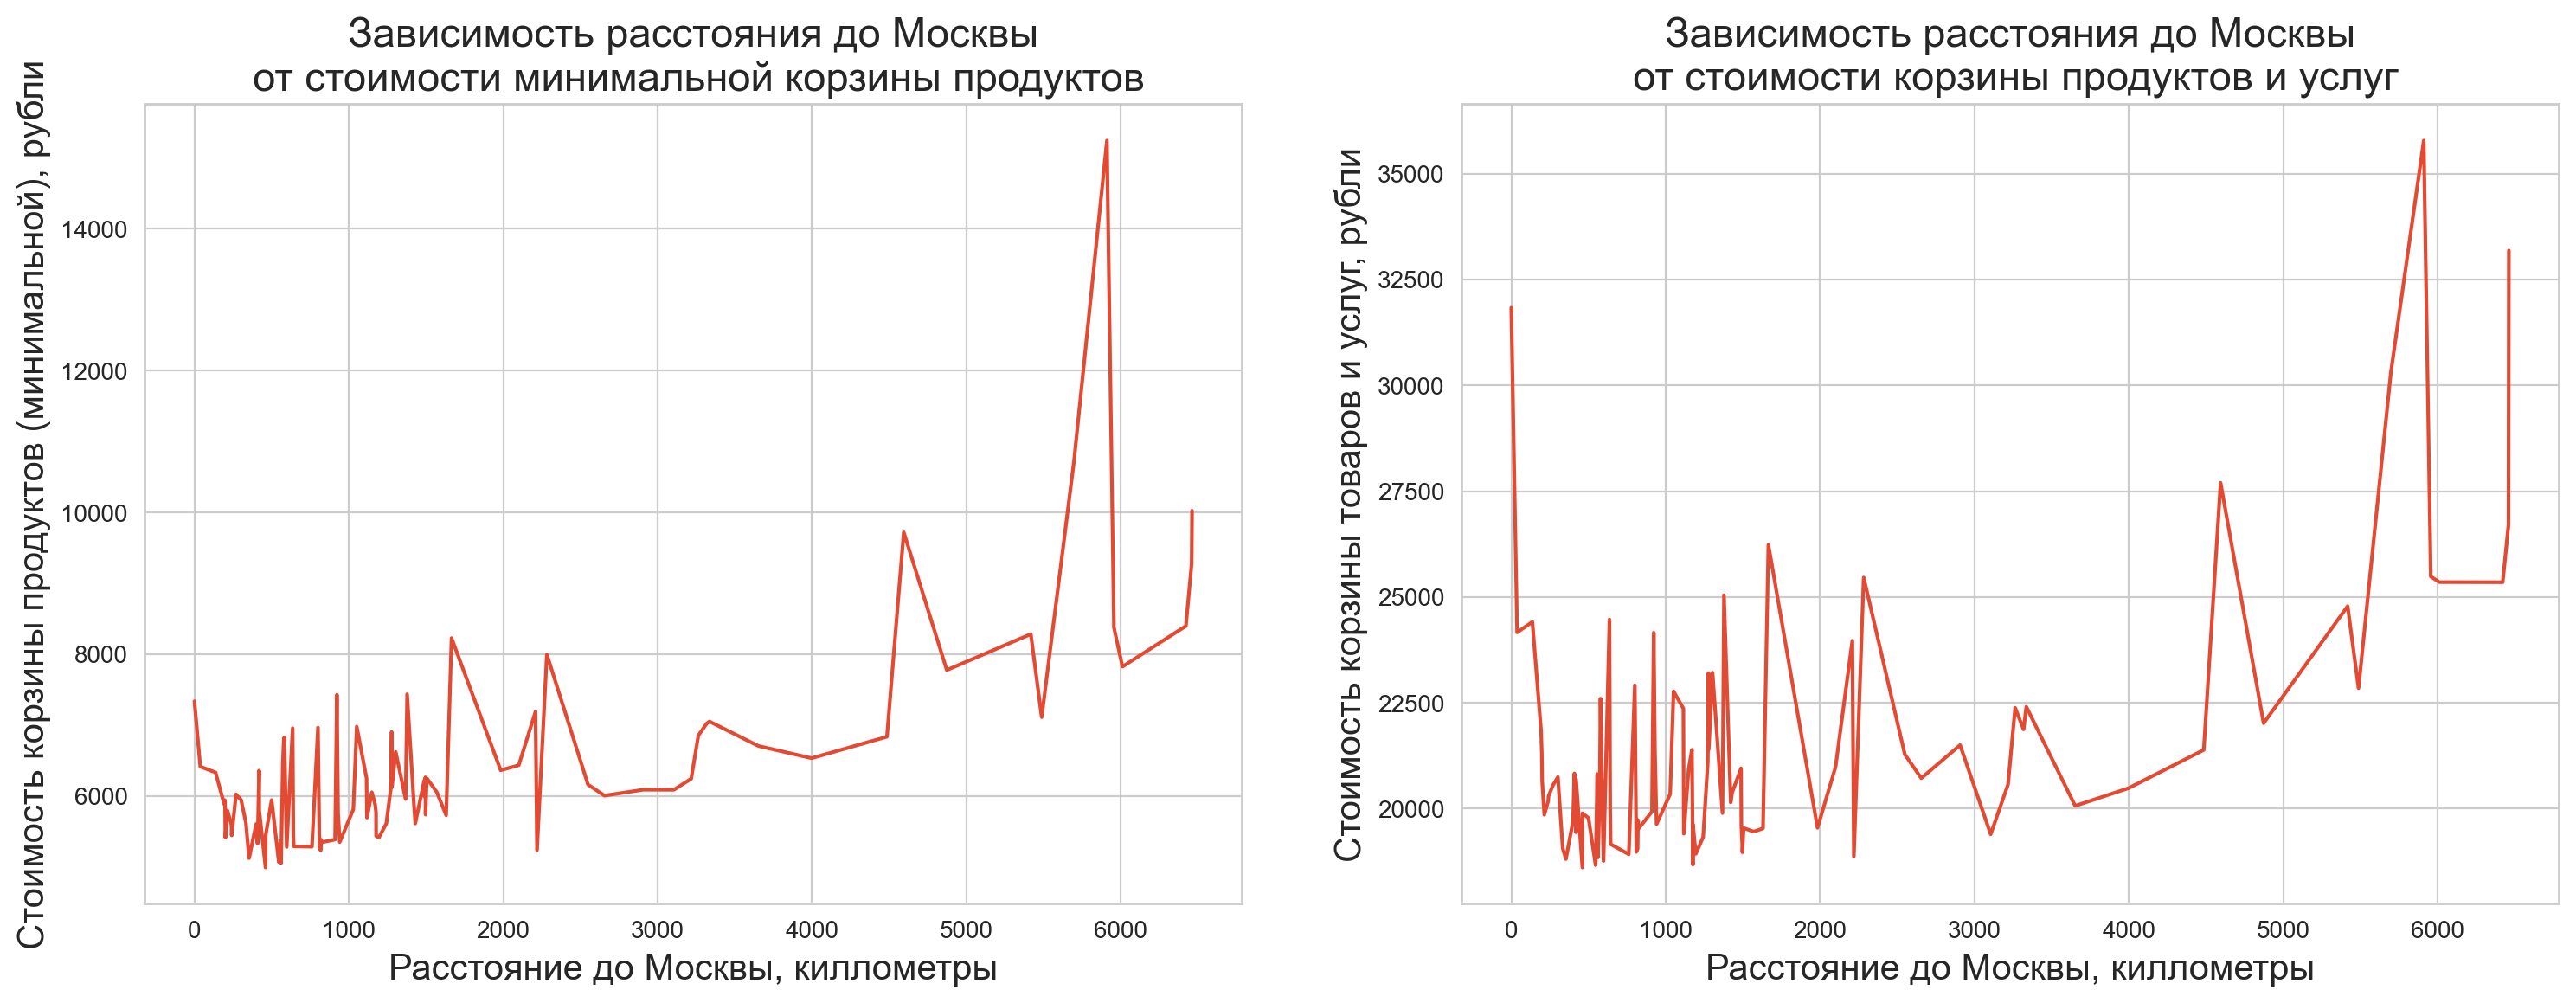

In [244]:
plt.figure(figsize = (18, 6))

plt.subplot(1, 2, 1)
plt.plot(df[['Расстояние до Москвы',"Стоимость корзины (минимальная)"]].sort_values(by=['Расстояние до Москвы'])['Расстояние до Москвы'],df[['Расстояние до Москвы',"Стоимость корзины (минимальная)"]].sort_values(by=['Расстояние до Москвы'])['Стоимость корзины (минимальная)'])
plt.title('Зависимость расстояния до Москвы\n от стоимости минимальной корзины продуктов', fontsize=17)
plt.ylabel('Стоимость корзины продуктов (минимальной), рубли', fontsize=15)
plt.xlabel('Расстояние до Москвы, киллометры', fontsize=15)
plt.grid()


plt.subplot(1, 2, 2)
plt.plot(df[['Расстояние до Москвы',"Стоимость корзины"]].sort_values(by=['Расстояние до Москвы'])['Расстояние до Москвы'], df[['Расстояние до Москвы',"Стоимость корзины"]].sort_values(by=['Расстояние до Москвы'])["Стоимость корзины"])
plt.title('Зависимость расстояния до Москвы\n от стоимости корзины продуктов и услуг', fontsize=17)
plt.ylabel('Стоимость корзины товаров и услуг, рубли', fontsize=15)
plt.xlabel('Расстояние до Москвы, киллометры', fontsize=15)
plt.grid()

На данном графике мы можем заметит, что стоимость в среднем увеличивается по мере удаления от Москвы, более хорошо это заметно на минимальной корзине товаров. В случае же с средней корзиной товаров, можем заметить, что колебания на расстоянии до 2000 киллометров более сильные. Вероятно, во-первых, на минимальной корзине товаров это более заметно по той причине, что в случае со средней корзиной товаров туда включены движимые услуги, цена которых более фиксированная, а не продаётся по себестоимости, поэтому занимая больший вес, она отражается менее чётко. Во вторых, можем предположить, что зависимость точно не один к одному, а она какая-то нелинейная.

**Что дальше:** В рамках работы я собираюсь выдвигать гипотезу о том, что по мере удалений от столицы стоимость товаров растёт, но основная проблема заключается в чистке данных от иных факторов, для этого были собраны остальные данные. Идея заключается в том, что группы будут кластеризированны по основным показателям, собранным, которые могут влиять на стоимость товаров, а дальше они будут внутри групп сравниваться по стоиомости. В случае с машинным обучением, я хотел бы попытаться предсказывать стоимость корзины в зависимости от расстояния до Москвы (вероятно, этот признак частично изменится в дальнейшем, так как его надо будет взвешивать на иные показатели, чтобы результаты хотя бы как-то предсказывались). Ещё я предпринимал изначальную попытку парсить Метро, я нашёл относительно готовый код, но пока не смог придумать, каким образом можно выбирать все города, если только в selenium не ручками всё прописывать, чего я не хочу делать, но возможно появиться какая-то новая идея + я постараюсь запарсить просто другой магазин, так как на примере каких-то конкретных товаров можно будет легче судить. Если гипотеза потвердится на этих данных, то, вероятно, для машинного обучения я постараюсь собрать статистику по городам, чтобы увеличить число наблюдений.